In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'C:/data/santa/'

In [6]:
data = pd.read_csv(path + '_cities.csv')

In [7]:
data['visited'] = False

In [8]:
data.head()

,Unnamed: 0,CityId,X,Y,visited,is_prime
0,0,0,316.836739,2202.340707,False,1
1,1,1,4377.405972,336.602082,False,1
2,2,2,3454.158198,2820.053011,False,1
3,3,3,4688.099298,2935.898056,False,1
4,4,4,1010.696952,3236.750989,False,0


In [7]:
primes = []
for possiblePrime in data['CityId'].unique():
    isPrime = True
    for num in range(2, possiblePrime):
        if possiblePrime % num == 0:
            isPrime = False
            break
      
    if isPrime:
        primes.append(possiblePrime)

In [143]:
primesFrame = set(primes)

In [170]:
data['is_prime'] = data['CityId'].apply(lambda x:1 if x in primesFrame else 0)

In [171]:
data.to_csv(path + '_cities.csv', encoding='utf-8')

In [127]:
penalty = 0.0

In [10]:
import matplotlib.pyplot as plt

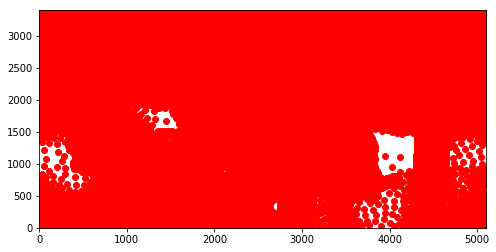

In [22]:
plt.figure(figsize=(8,4))
plt.plot(list(data['X']), list(data['Y']), 'ro')
plt.axis([data['X'].min(), data['X'].max(), data['Y'].min(), data['Y'].max()])
plt.show()

In [218]:
%%time
visited = []
start = 0
penalty = 1.0
visited.append(start)
L1 = list(data[['X', 'Y']].loc(0)[start])
data['visited'][start] = True
not_visited_data = data[~data['visited']]
last_distance = 0
while not_visited_data.shape[0] > 0:
    cnt = not_visited_data.shape[0]
    if cnt % 100 == 0:
        print('Left ', cnt)
    if len(visited) % 10 == 0:
        penalty = 0.2
    else:
        penalty = 0.0
    not_visited_data['distance'] = not_visited_data[['X', 'Y']].sub(np.array(L1)).pow(2).sum(1).pow(0.5)
    not_visited_data['distance'] += last_distance * (1 - not_visited_data['is_prime']) * penalty
    dist_near_city = not_visited_data['distance'].min()
    last_distance = dist_near_city
    near_city = not_visited_data[not_visited_data['distance'] == dist_near_city]
    city_id = list(near_city['CityId'])[0]
    #if len(visited) % 10 == 0 and city_id in primes:
    #    penalty = 1.0
        
    visited.append(city_id)
    
    L1 = [not_visited_data['X'][city_id], not_visited_data['Y'][city_id]]
    not_visited_data['visited'][city_id] = True
    not_visited_data = not_visited_data[~not_visited_data['visited']]
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-p

KeyboardInterrupt: 

In [217]:
pd.DataFrame(data=visited, columns=['Path']).to_csv('output/submit_19_12_3.csv', index=False)